# **Stock Price Prediction**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import nltk as nltk
import yfinance as yf

In [48]:
import sys
sys.path.append('../')
news = pd.read_csv('../docs/raw_analyst_ratings.csv')

## Exploratory Data Analysis

>> ## Descriptive Statistics

In [49]:
news.head()

,git rm --cached docs/raw_analyst_ratings.csv,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


>>> ### headline length and stats

In [50]:
# headline length
news['headline_length'] = news['headline'].str.len()

# other statistics
mean_length = news['headline_length'].mean()
median_length = news['headline_length'].median()
mode_length = news['headline_length'].mode().tolist()
min_length = news['headline_length'].min()
max_length = news['headline_length'].max()
std_dev = news['headline_length'].std()

# Print the results
print("Mean headline length:", mean_length)
print("Median headline length:", median_length)
print("Mode headline length:", mode_length)
print("Minimum headline length:", min_length)
print("Maximum headline length:", max_length)
print("Standard Deviation of headline length:", std_dev)


Mean headline length: 73.12051490484095
Median headline length: 64.0
Mode headline length: [47]
Minimum headline length: 3
Maximum headline length: 512
Standard Deviation of headline length: 40.73530993195065


>>> ### Articles per publisher

In [51]:
# Number of articles per publisher
publisher_counts = news['publisher'].value_counts()
publisher_counts_sorted = publisher_counts.sort_values(ascending=False)
print(publisher_counts_sorted)

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64


In [52]:
# Count number of missing dates
error_count= news['date'].isna().sum()
print(f"Number of missing dates: {error_count}")

Number of missing dates: 0


>>> ### Publication dates analysis

In [53]:
# Format date
from scripts.dateFormat import formatDate
news['date']=formatDate(news)

news['year'] = news['date'].dt.year
news['month'] = news['date'].dt.month_name()
news['day'] = news['date'].dt.day
news['day_of_week'] = news['date'].dt.day_name()


month_order = [
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
]

news['month'] = pd.Categorical(news['month'], categories=month_order, ordered=True)


In [54]:
news.head()

,git rm --cached docs/raw_analyst_ratings.csv,headline,url,publisher,date,stock,headline_length,year,month,day,day_of_week
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,39,2020,June,5,Friday
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,42,2020,June,3,Wednesday
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,29,2020,May,26,Tuesday
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,44,2020,May,22,Friday
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,87,2020,May,22,Friday


In [55]:
# Count articles by year, month, day, and day of the week
articles_by_year = news.groupby('year').size()
articles_by_month = news.groupby('month').size()
articles_by_day = news.groupby('day').size()
articles_by_day_of_week = news.groupby('day_of_week').size()

/tmp/ipykernel_7231/2834599596.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  articles_by_month = news.groupby('month').size()


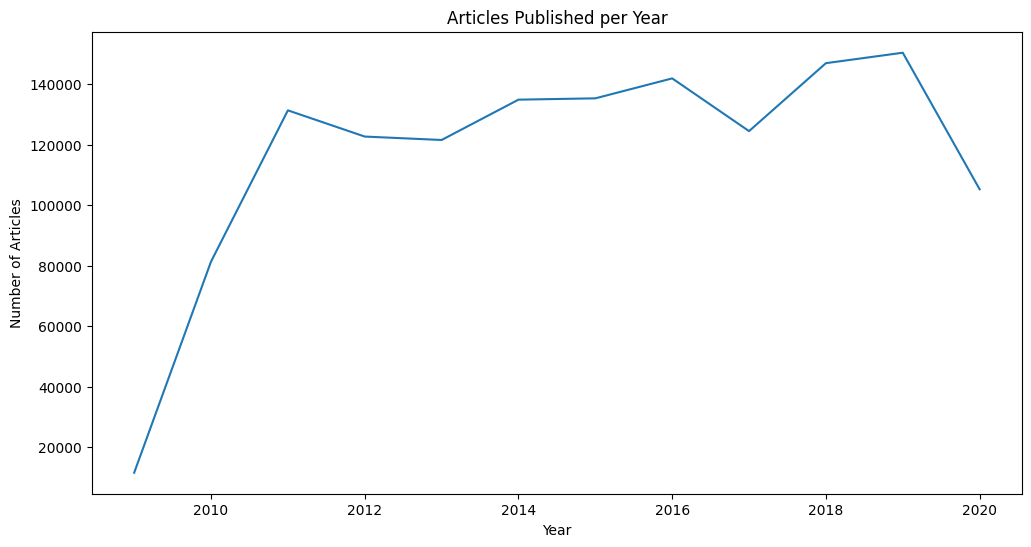

In [56]:
# Visualize trends
plt.figure(figsize=(12, 6))
plt.plot(articles_by_year.index, articles_by_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.title('Articles Published per Year')
plt.show()

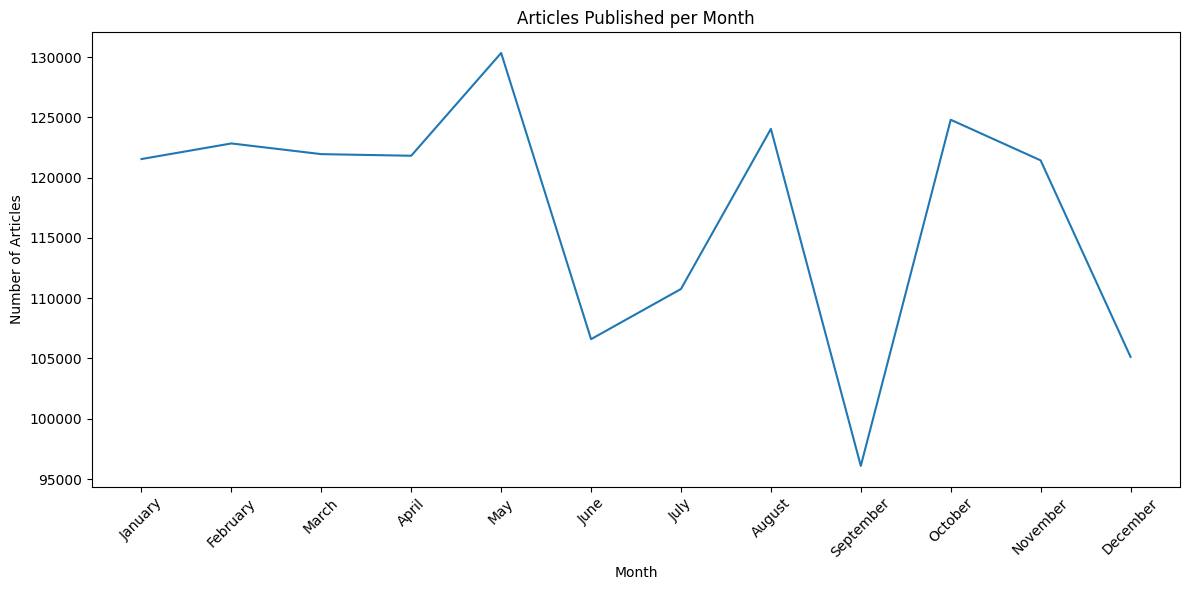

In [57]:
# Visualize articles by month
plt.figure(figsize=(12, 6))
plt.plot(articles_by_month.index, articles_by_month.values)
plt.xticks(articles_by_month.index)
plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.title('Articles Published per Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

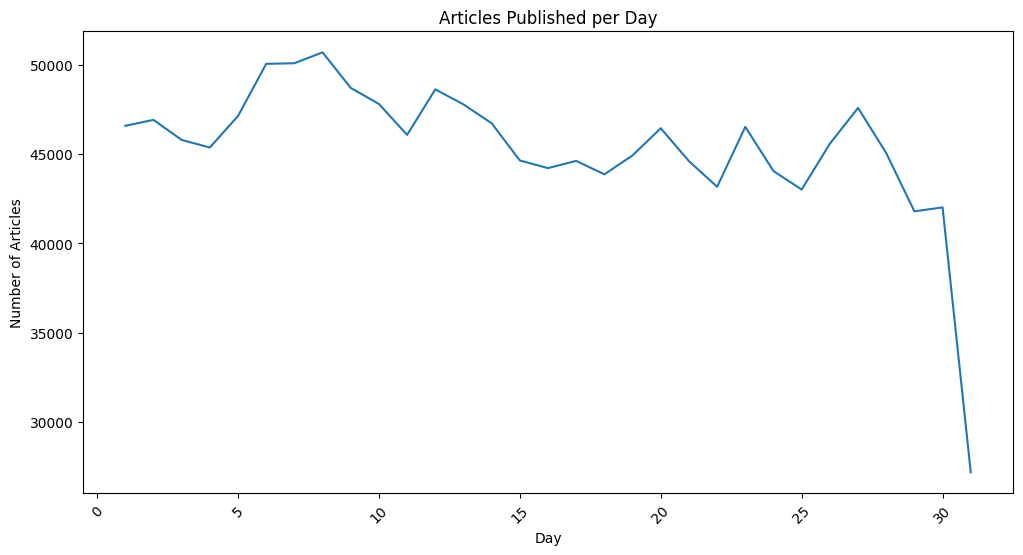

In [58]:
# Visualize articles by day
plt.figure(figsize=(12, 6))
plt.plot(articles_by_day.index, articles_by_day.values)
plt.xlabel('Day')
plt.ylabel('Number of Articles')
plt.title('Articles Published per Day')
plt.xticks(rotation=45)
plt.show()

>> ## Text Analysis(Sentiment analysis & Topic Modeling)

>>> ### Sentiment analysis on headlines

In [ ]:
from scripts.getSentiment import get_sentiment
from scripts.getSentiment import classify_sentiment_score

news['sentiment_score'] = news['headline'].apply(get_sentiment)
news['sentiment_score_class'] = news['sentiment_score'].apply(classify_sentiment_score)
print(news[['headline', 'sentiment_score','sentiment_score_class']].head(40))

In [ ]:
min_score = news['sentiment_score'].min()
max_score = news['sentiment_score'].max()

# Display the results
print(f"Lowest sentiment score: {min_score}")
print(f"Highest sentiment score: {max_score}")

In [ ]:
news['sentiment_score_class'].value_counts()

>>> ### Keyword and topic identification

In [ ]:
import pandas as pd
import spacy
from gensim import corpora
from gensim.models import LdaModel
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
import sys
sys.path.append('../')


#I used sample data because using the original news data requires large computational power
sample_data = {
    'headline': [
        'FDA approval expected for new cancer drug',
        'Tech stocks soar after strong earnings report',
        'New merger talks boost company stock prices',
        'Economic forecasts predict growth slowdown',
        'Oil prices drop as supply increases',
        'Acquisition deal finalized between two companies',
        'Retail sales spike during holiday season',
        'Healthcare reform impacts insurance companies',
        'Price target raised for leading tech company',
        'Government announces new tax cuts'
    ]
}

# Convert sample data into a DataFrame
news_sample = pd.DataFrame(sample_data)


#news_topic = news.head(3)


nlp = spacy.load('en_core_web_sm')

# Define specific keywords or phrases you're interested in
keywords = {'FDA approval', 'price target', 'merger', 'acquisition', 'revenue', 'profit', 'market'}

# Text Preprocessing using spaCy
def preprocess_text(text, keywords):
    doc = nlp(text.lower())
    tokens = [token.text for token in doc if token.text in keywords]
    return tokens

news_sample['tokens'] = news_sample['headline'].apply(lambda x: preprocess_text(x, keywords))

news_topic = news_sample[news_sample['tokens'].map(len) > 0]

dictionary = corpora.Dictionary(news_sample['tokens'])
corpus = [dictionary.doc2bow(text) for text in news_sample['tokens']]

lda_model = LdaModel(
    corpus,
    num_topics=2,  
    id2word=dictionary,
    passes=5 
)

# Display the topics
topics = lda_model.print_topics(num_words=4)
for topic in topics:
    print(topic)

# Visualize the topics
vis = gensimvis.prepare(lda_model, corpus, dictionary)

pyLDAvis.display(vis)


>> ## Time Series Analysis

>>> ### Publication variability over time

In [ ]:
# Visualize articles by day of the week
plt.figure(figsize=(12, 6))
plt.plot(articles_by_day_of_week.index, articles_by_day_of_week.values)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Articles')
plt.title('Articles Published per Day of the Week')
plt.xticks(rotation=45)
plt.show()

In [2]:
# Analysis of publishing times might reveal if there’s a 
# specific time when most news is released, which could be crucial for traders and automated trading systems.
news['date'] = pd.to_datetime(news['date'])
news['publication_hour'] = news['date'].dt.hour
articles_by_hour = news.groupby('publication_hour').size()

# Visualize the trend
plt.figure(figsize=(12, 6))
plt.bar(articles_by_hour.index, articles_by_hour.values)
plt.xlabel('Hour')
plt.ylabel('Number of Articles (logarithmic scale)')
plt.title('Articles Published per Hour (Logarithmic Scale)')
plt.yscale('log')  # Use logarithmic scale for y-axis
plt.xticks(range(24))
plt.show()

NameError: name 'news' is not defined

>> ## Publisher Analysis

>>> ### Dominant Publishers and their sentiment

In [ ]:
publisher_counts = news['publisher'].value_counts()
total_articles = news.shape[0]
publisher_percentages = (publisher_counts / total_articles) * 100
dominant_publishers = publisher_percentages[publisher_percentages > 10].index

print("Dominant publishers:")
print(dominant_publishers,'\n\n')

# Step 2: Filter data for dominant publishers
dominant_news = news[news['publisher'].isin(dominant_publishers)]

# Ensure 'sentiment_score' is the correct column name for sentiment values
dominant_news['sentiment_category'] = dominant_news['sentiment_score'].apply(classify_sentiment_score)

# Step 4: Count sentiments by publisher
sentiment_counts = dominant_news.groupby(['publisher', 'sentiment_category']).size().unstack(fill_value=0)

# Step 5: Print the results
for publisher in dominant_publishers:
    print(f"{publisher}:")
    if publisher in sentiment_counts.index:
        counts = sentiment_counts.loc[publisher]
        print(f"  - positive sentiment     {counts.get('Positive', 0)} times")
        print(f"  - negative sentiment     {counts.get('Negative', 0)} times")
        print(f"  - neutral sentiment      {counts.get('Neutral', 0)} times")
    else:
        print("  No data available")

In [ ]:
publishers = sentiment_counts.index.to_numpy()
sentiment_labels = sentiment_counts.columns.to_numpy()
sentiment_data = sentiment_counts.values

# Create subplots for each publisher
fig, axes = plt.subplots(len(publishers), 1, figsize=(10, 6))

# Iterate through publishers and create histograms
for i, publisher in enumerate(publishers):
    ax = axes[i]
    ax.bar(sentiment_labels, sentiment_data[i], color=['green', 'red', 'blue'])
    ax.set_title(f"{publisher} Sentiment Distribution")
    ax.set_xlabel("Sentiment Category")
    ax.set_ylabel("Number of Articles")
    ax.set_xticks(sentiment_labels)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

>>> ### Domain Identification

In [ ]:
import re

# Extract email domains
def extract_domain(email):
    if '@' in email:
        return email.split('@')[1]
    else:
        return None  # Or handle invalid email addresses as needed

news['publisher_domain'] = news['publisher'].apply(extract_domain)

# Count unique domains
domain_counts = news['publisher_domain'].value_counts()

# Calculate domain contribution
total_articles = news.shape[0]
domain_percentages = (domain_counts / total_articles) * 100

# Identify dominant domains
dominant_domains = domain_percentages[domain_percentages > 0]  # Adjust threshold as needed

print("Dominant domains:")
print(domain_counts)

In [ ]:
publisher_sentiment_counts = news.groupby('publisher')['sentiment_score'].value_counts()
total_articles_by_publisher = news.groupby('publisher').size()
publisher_sentiment_percentages = (publisher_sentiment_counts / total_articles_by_publisher).mul(100)
print(publisher_sentiment_percentages)


# Quantitative analysis using TaLib

>> ## Load and prepare stock data

In [ ]:
stocks = ['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT', 'NVDA', 'TSLA']
stock_data = {}
for stock in stocks:
    file_name = f'../docs/yfinance_data/{stock}_historical_data.csv'
    stock_data[stock] = pd.read_csv(file_name)
print("\n\t\tAAPL\n",stock_data['AAPL'].head())
print("\n\n\t\tAMZN\n",stock_data['AMZN'].head())

>> ## Apply Analysis Indicators with TA-Lib

In [ ]:
import yfinance as yf
import matplotlib.dates as mdates

# Download Microsoft stock data
msft = yf.Ticker("MSFT")
hist = msft.history(period="max")

# Create a figure and subplots
fig, axes = plt.subplots(1, 4, figsize=(12, 4))

# Plot Close price
axes[0].plot(hist.index, hist['Close'], label='Close')
axes[0].set_title('Close Price')
axes[0].legend()

# Plot Open price
axes[1].plot(hist.index, hist['Open'], label='Open')
axes[1].set_title('Open Price')
axes[1].legend()

# Plot High price
axes[2].plot(hist.index, hist['High'], label='High')
axes[2].set_title('High Price')
axes[2].legend()

# Plot Low price
axes[3].plot(hist.index, hist['Low'], label='Low')
axes[3].set_title('Low Price')
axes[3].legend()

for ax in axes:
    ax.xaxis.set_major_locator(mdates.YearLocator(10))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))


# Rotate x-axis labels for readability
plt.setp(axes[-1].xaxis.get_majorticklabels(), rotation=45, ha='right')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
import sys
import traceback
sys.path.append('..')
from scripts.financeAnalyzer import *

analyzer = {}
try:
    for stock in stocks:
        analyzer[stock] = FinancialAnalyzer(stock, '2020-01-01', '2020-12-31')
        analyzer[stock+'data'] = analyzer[stock].retrieve_stock_data()
        analyzer[stock+'stock_data_indicators'] = analyzer[stock].calculate_technical_indicators(analyzer[stock+'data'])
except Exception as e:
    print("An error occurred:")
    print(traceback.format_exc())

In [ ]:
from IPython.display import display
stock_ = 'AMZN'
for stock in stocks:
    if stock+'stock_data_indicators' in analyzer:
        display(stock+" :",analyzer[stock+'stock_data_indicators'].tail())
    else:
        print(f"no data for {stock+'stock_data_indicators'}")

>> ## Visualize Indicators

In [ ]:
fig, axes = plt.subplots(1, len(stocks), figsize=(15, 6))

for ax, stock in zip(axes, stocks):
    analyzer[stock].plot_stock_data(analyzer[f'{stock}data'], ax=ax)

fig.suptitle('Stock Prices with Moving Averages', fontsize=16)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Display all plots together
plt.show()

In [ ]:
fig, axes = plt.subplots(1, len(stocks), figsize=(15, 6))

for ax, stock in zip(axes, stocks):
    analyzer[stock].plot_rsi(analyzer[f'{stock}data'], ax=ax)

fig.suptitle('Stock Prices with Relative Strength Index (RSI)', fontsize=16)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Display all plots together
plt.show()

In [ ]:
fig, axes = plt.subplots(1, len(stocks), figsize=(15, 6))

for ax, stock in zip(axes, stocks):
    analyzer[stock].plot_ema(analyzer[f'{stock}data'], ax=ax)

fig.suptitle('Stock Prices with EMA', fontsize=16)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Display all plots together
plt.show()

In [ ]:
fig, axes = plt.subplots(1, len(stocks), figsize=(15, 6))

for ax, stock in zip(axes, stocks):
    analyzer[stock].plot_macd(analyzer[f'{stock}data'], ax=ax)

fig.suptitle('Stock Prices with MACD', fontsize=16)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Display all plots together
plt.show()

In [ ]:
weights = analyzer[stock].calculate_portfolio_weights(['AAPL', 'GOOG', 'MSFT'], '2020-01-01', '2020-12-31')
print(weights)

In [ ]:
performance = analyzer[stock].calculate_portfolio_performance(['AAPL', 'GOOG', 'MSFT'], '2020-01-01', '2020-12-31')
print(performance)

In [ ]:
# Calculate portfolio performance

portfolio_return, portfolio_volatility, sharpe_ratio = analyzer[stock].calculate_portfolio_performance(['AAPL', 'GOOG', 'MSFT'], '2020-01-01', '2020-12-31')
print(f"Portfolio Return: {portfolio_return:.2f}%")
print(f"Portfolio Volatility: {portfolio_volatility:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")

In [19]:
for stock in stocks:
    stock_data[stock]['Date'] = formatDate(stock_data[stock],True)

# Correlation between news and stock movement

In [ ]:
print(stock_data['TSLA'].head())
# print(news.head())

>> ## Date Alignment

In [21]:
#news['date'] = pd.to_datetime(news['date'],format='ISO8601')
#stock_data['AAPL']['date'] = pd.to_datetime(stock_data['AAPL']['Date'],format='ISO8601')
news['date'] = pd.to_datetime(news['date'],format='ISO8601').dt.tz_localize(None)
stock_data['TSLA']['date'] = pd.to_datetime(stock_data['TSLA']['Date'],format='ISO8601').dt.tz_localize(None)


In [ ]:
print(stock_data['AAPL'].columns)


>>> ### Calculate daily return

In [23]:
stock_data['AAPL']['daily_return'] = stock_data['AAPL']['Close'].pct_change()


In [ ]:
aligned_data = stock_data['AAPL'][['daily_return']]
stock_data['AAPL'].head()


In [ ]:
aligned_data['Date'] = pd.to_datetime(stock_data['AAPL']['Date']).dt.tz_localize(None)
daily_sentiment = news.groupby('date', as_index=False)['sentiment_score'].mean()
stock_data['AAPL']['daily_return'] = stock_data['AAPL']['Adj Close'].pct_change()


In [ ]:
stock_data['AAPL'].head()

>>> ### Correlation Analysis

In [39]:
daily_sentiment['date'] = pd.to_datetime(daily_sentiment['date'])
stock_data['AAPL']['Date'] = pd.to_datetime(stock_data['AAPL']['Date'])


In [40]:
final_df = pd.merge(daily_sentiment, stock_data['AAPL'][['Date', 'daily_return']], left_on='date', right_on='Date')


In [43]:
final_df.dropna(inplace=True)


In [45]:

correlation = final_df['sentiment_score'].corr(final_df['daily_return'])

In [ ]:
import seaborn as sns
correlation_matrix = final_df[['sentiment_score', 'daily_return']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Correlation Heatmap between Sentiment and Stock Returns')
plt.show()


In [ ]:

print(f"Correlation between daily sentiment and stock daily returns: {correlation}")


In [52]:
final_df.to_csv('merged_sentiment_stock_data.csv', index=False)
